# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the Dataset

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape

(8523, 12)

In [5]:
test.shape

(5681, 11)

# Checking null values in the dataframe

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

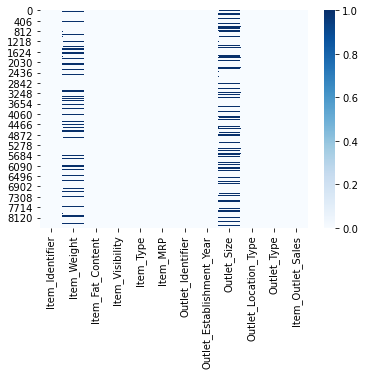

In [8]:
#data visualisation
sns.heatmap(train.isnull(),cmap='Blues')

<AxesSubplot:>

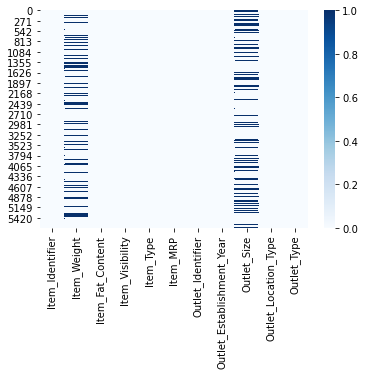

In [9]:
sns.heatmap(test.isnull(),cmap='Blues')

Observation: 
   1. Outliers present in Item_Weight and Outlet_Size in both training and testing dataset.
   2. Training Dataset: Roughly 17% of data in Item_Weight and 28% of data in Outlet_Size is missing.
   3. Testing Dataset: Roughly 17% of data in Item_Weight and 28% of data in Outlet_Size is missing.

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#training set

Categorical Data:
    1.Item_Fat_Content
    2.Item_Type
    3.Outlet_Size
    4.Outlet_Location_Type
    5.Outlet_Type
    
Numerical Data:
    1.Item_Weight
    2.Item_Visibility
    3.Item_MRP 
    4.Outlet_Establishment_Year
    5.Item_Outlet_Sales 
    
Mixed Data:
    1.Item_Identifier
    2.Outlet_Identifier

In [12]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [13]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

#testing set

Categorical Data:
    1.Item_Fat_Content
    2.Item_Type
    3.Outlet_Size
    4.Outlet_Location_Type
    5.Outlet_Type
    
Numerical Data:
    1.Item_Weight
    2.Item_Visibility
    3.Item_MRP 
    4.Outlet_Establishment_Year
    
Mixed Data:
    1.Item_Identifier
    2.Outlet_Identifier
    

# Exploratory Data Analysis:

# Univariate Analysis(Categorical Data):

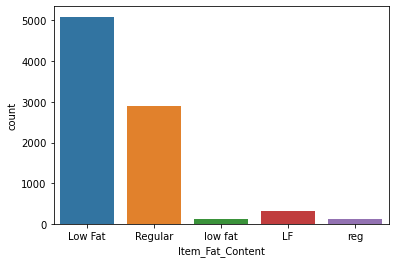

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [14]:
sns.countplot(x='Item_Fat_Content',data=train)
plt.show()
print(train['Item_Fat_Content'].value_counts())

Observation:
For Item_Fat_Content there are two possible type “Low Fat” or “Regular”. However, in our data it is written in different manner. We will Correct this

In [15]:
train.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
test.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

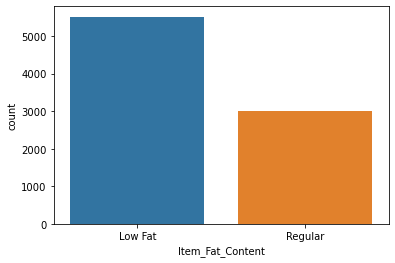

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [16]:
sns.countplot(x='Item_Fat_Content',data=train)
plt.show()
print(train['Item_Fat_Content'].value_counts())

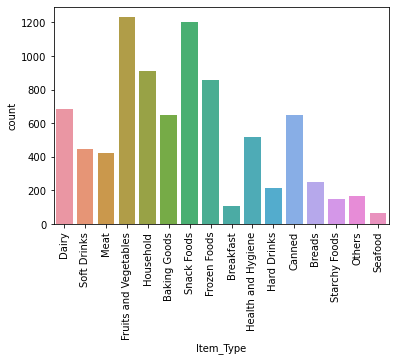

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [17]:
sns.countplot(x='Item_Type',data=train)
plt.xticks(rotation=90)
plt.show()
print(train['Item_Type'].value_counts())

Observation:
1.Maximum item is Fruits and Vegetables.
2.For Item_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

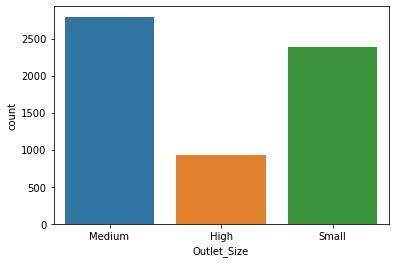

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [18]:
sns.countplot(x='Outlet_Size',data=train)
plt.show()
print(train['Outlet_Size'].value_counts())

Observation:
There seems to be less number of stores with size equals to “High”.

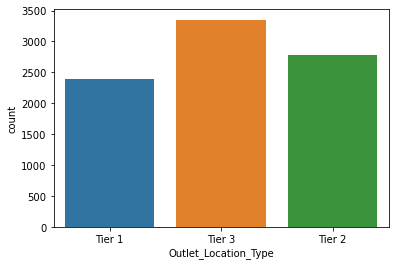

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [19]:
sns.countplot(x='Outlet_Location_Type',data=train)
plt.show()
print(train['Outlet_Location_Type'].value_counts())

Observation:
From the above graph we can see that Bigmart is a brand of medium and small size city compare to densely populated area.

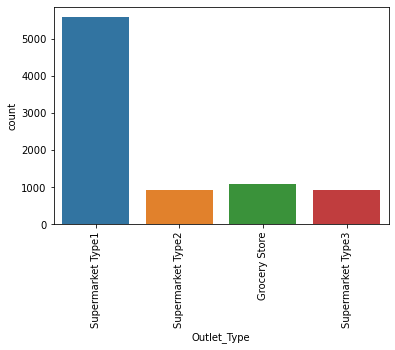

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [20]:
sns.countplot(x='Outlet_Type',data=train)
plt.xticks(rotation=90)
plt.show()
print(train['Outlet_Type'].value_counts())

Observation:
    Manimum outlet belongs to Supermarket Type_1

# Univariate Analysis(Numerical Data):

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

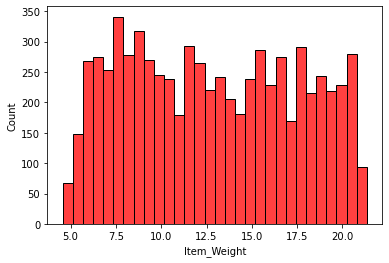

In [21]:
sns.histplot(data=train,x='Item_Weight',bins=30,color='red')

Observation:
Maximum items have the weight in the range of 7.5-9

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

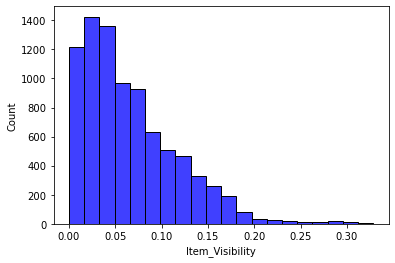

In [22]:
sns.histplot(data=train,x='Item_Visibility',bins=20,color='blue')

Observation:
    Maximum items have lower item visibility.

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

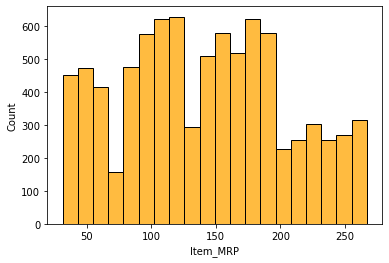

In [23]:
sns.histplot(data=train,x='Item_MRP',bins=20,color='orange')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

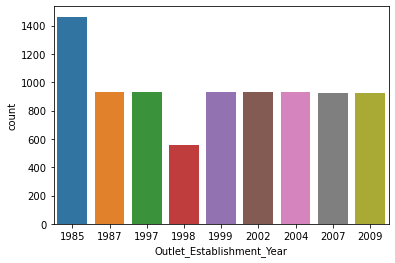

In [24]:
sns.countplot(data=train,x='Outlet_Establishment_Year')

Observaion:
    Most of the oulet was established in the year 1985

# Bivariate Analysis(Categorical Data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

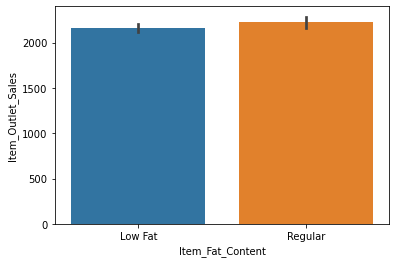

In [25]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

Observation:
    Regular Items are contributing in maximum sales followed by Low Fat

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

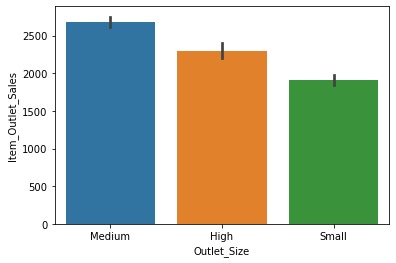

In [26]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

Observation:
    High outlet contributes in maximum sales

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

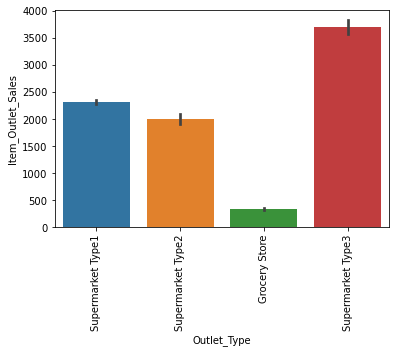

In [27]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)

Observation:
    Supermarket Type3 contributes maximum sales

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

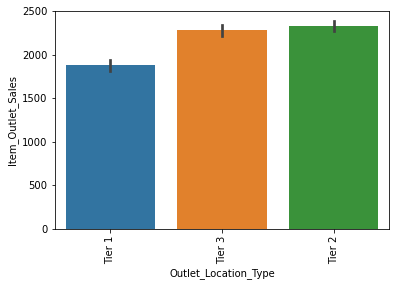

In [28]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)

Observation:
    Tier2 City contributes maximum sales followed by Tier3 city

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

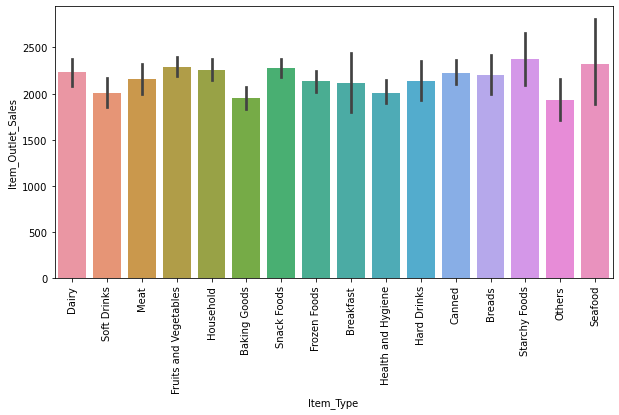

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)

Observation:
    Seafood items and starchy items are contributing high on oulet sales

# Bivariate Analysis(Numerical Data)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

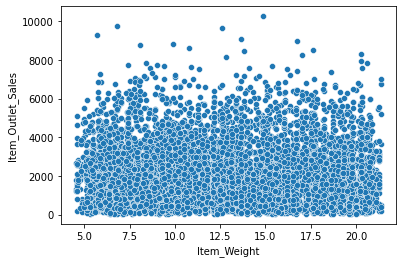

In [30]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=train)

Observation:
    Item_Weight has low correlation with our target variable.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

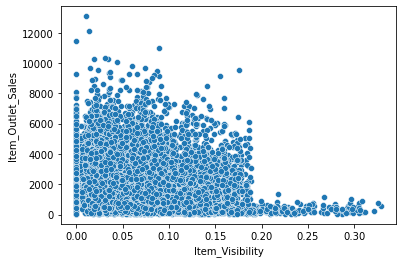

In [31]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train)

Observation:
    Item_Visibility has low correlation with our target variable.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

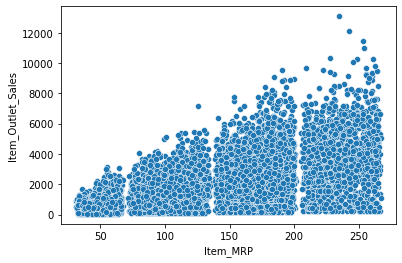

In [32]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train)

Observation:
    Item_MRP has positive correlation with our target variable.

# Data Set Description

In [33]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


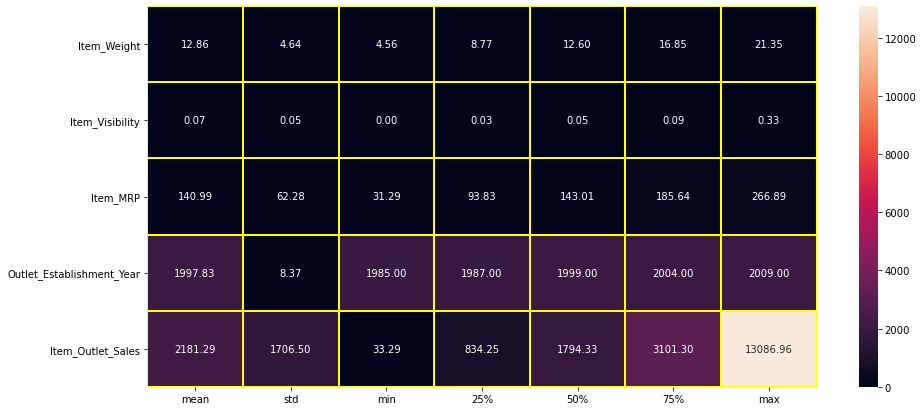

In [34]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(train.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:

-->Item_Weight
1. min- 4.56
2. max- 21.35
3. mean- 12.86
4. median- 12.60
5. std- 4.64


-->Item_visibility
1. min- 0.00
2. max- 0.33
3. mean- 0.07
4. median- 0.05
5. std- 0.05


-->Item_MRP
1. min- 31.29
2. max- 266.89
3. mean- 140.99
4. median- 143.01
5. std- 62.28


-->Outlet_Establishment_Year
1. min- 1985
2. max- 2009
3. mean- 1997.83
4. median- 1999
5. std- 8.37


# Checking Skewness

In [35]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

keeping +/-0.5 as the range for the skewness here are the columns which doesnot lie within this range.
1. Item_Fat_Content. --> categorical
2. Item_Visibility.--> numerical
3. Outlet_Type-->categorical
4. Item_Oulet_Sales-->Target

Only Item_Visibility is the numerical column which doesnot fall in this range and would require further treatment.

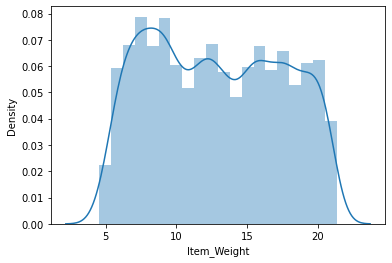

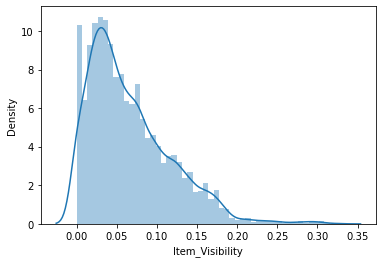

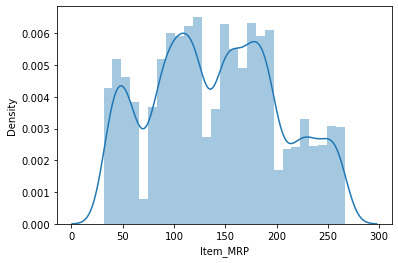

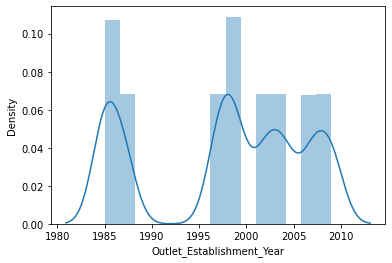

In [36]:
num_attrs=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in num_attrs:
    sns.distplot(train[i])
    plt.show()

Observation:
    1. Except Item_Visibility all other numerical data are kind of normally distributed.
    2. Item_Visibility is right skewed.

# Correlation of columns with target columns

In [37]:
train.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

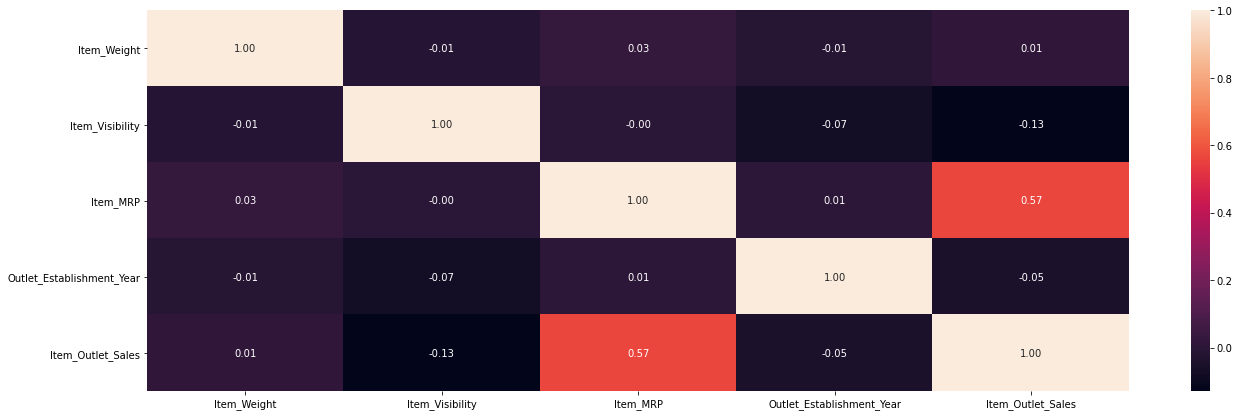

In [38]:
plt.figure(figsize=(22,7))
sns.heatmap(train.corr(),annot=True,fmt='0.2f',linecolor='yellow')

Observation:
    From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable. 

# DATA PREPROCESSING:

# Filling Missing Values:

In [39]:
#OUTLET SIZE
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [40]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
test['Outlet_Size'].mode()

0    Medium
dtype: object

In [42]:
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [43]:
#ITEM_WEIGHT
train['Item_Weight']= train['Item_Weight'].fillna(np.mean(train['Item_Weight']))
test['Item_Weight']= test['Item_Weight'].fillna(np.mean(test['Item_Weight']))
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
#The item visibility has the minimum value of zero from our earlier descriptive statistics,it makes no sense as all the items needs to be visible to the customers.This is an indication that we need to treat this a missing value.
train[train['Item_Visibility']==0]['Item_Visibility'].value_counts()

0.0    526
Name: Item_Visibility, dtype: int64

In [45]:
test[test['Item_Visibility']==0]['Item_Visibility'].value_counts()

0.0    353
Name: Item_Visibility, dtype: int64

In [46]:
train['Item_Visibility']= train['Item_Visibility'].replace(0,np.median(train['Item_Visibility'],axis=0))
test['Item_Visibility']= test['Item_Visibility'].replace(0,np.median(test['Item_Visibility'],axis=0))
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
train[train['Item_Visibility']==0]['Item_Visibility'].value_counts()

Series([], Name: Item_Visibility, dtype: int64)

In [48]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Feature Engineering:

In [49]:
#item type
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [50]:
train.pivot_table(index='Item_Type',columns='Item_Identifier',values='Item_MRP')

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Type,,,,,,,,,,,,,,,,,,,,,
Baking Goods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breakfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen Foods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fruits and Vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hard Drinks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health and Hygiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.132333,NaN,38.217267,NaN,126.2612,NaN,125.6304,NaN,188.3214,NaN


The item types are either food,drinks or non consumable.

In [51]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
NCI54     9
FDP25     9
         ..
FDC23     1
FDK57     1
FDT35     1
FDE52     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

A closer look at each of the Item_Identifier shows that they with either "FD"(Food), "DR"(Drinks), "NC"(Non-Consumables)

For us to do a better analysis, we will be creating 3 categories as pointed out instead of the already existing 16 categories.

In [52]:
#Changing only the first 2 characters (i.e. the category ID)

train['New_Item_type'] = train['Item_Identifier'].apply(lambda x: x[0:2])
test['New_Item_type'] = test['Item_Identifier'].apply(lambda x: x[0:2])

In [53]:
#Rename them :

train['New_Item_type'] = train['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test['New_Item_type'] = test['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train['New_Item_type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

In [54]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


In [55]:
pd.crosstab(train['New_Item_type'],train['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
New_Item_type,,
Drinks,728,71
Food,3190,2935
Non-Consumable,1599,0


In [56]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [57]:
#since non consumable items cannot be associated with fat content so we create a separate category
train.loc[train['New_Item_type']=='Non-Consumable','Item_Fat_Content']='Non Edible'
test.loc[test['New_Item_type']=='Non-Consumable','Item_Fat_Content']='Non Edible'

train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [58]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.930,Non Edible,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food


In [59]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [60]:
train['total_years']=2009-train['Outlet_Establishment_Year']
test['total_years']=2009-test['Outlet_Establishment_Year']
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,total_years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,FDX07,19.200,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,11
4,NCD19,8.930,Non Edible,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,22
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,7
8520,NCJ29,10.600,Non Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,0


In [61]:
#Drop the columns which have been converted to different types:
train.drop(['Outlet_Establishment_Year','Item_Identifier',],axis=1,inplace=True)
test.drop(['Outlet_Establishment_Year','Item_Identifier',],axis=1,inplace=True)

# Outliers Checking:

Item_Weight             AxesSubplot(0.125,0.536818;0.227941x0.343182)
Item_Visibility      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Item_MRP             AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Item_Outlet_Sales          AxesSubplot(0.125,0.125;0.227941x0.343182)
total_years             AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

<Figure size 1080x1080 with 0 Axes>

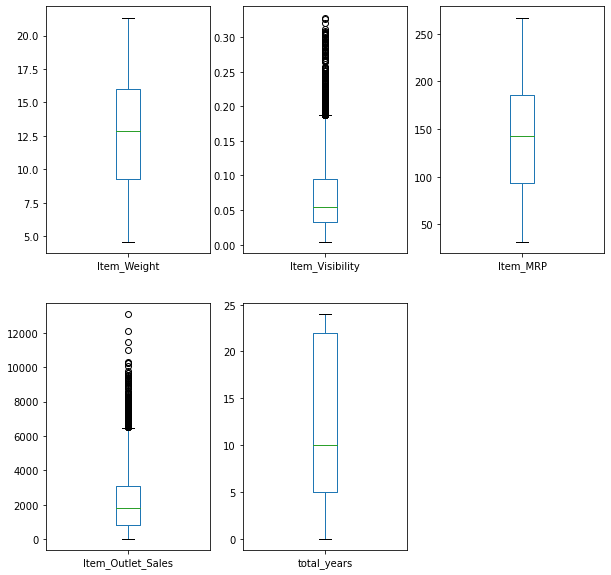

In [62]:
plt.figure(figsize=(15,15))
train.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))


Observation:
    1.Item_Outlet_Sales(target) and Item_Visibility have outliers present.
    2.The data in Item_Visibility is very close to upper whisker and cannot be treated as an outlier.

# REMOVING SKEWNESS:

In [63]:
train['Item_Visibility']=np.cbrt(train['Item_Visibility'])
test['Item_Visibility']=np.cbrt(test['Item_Visibility'])

In [64]:
train['Item_Visibility'].skew()

0.1702013876099692

# Converting categorical data to numerical data using encoding techniques

In [65]:
df=pd.get_dummies(train,drop_first=True)
df_test=pd.get_dummies(test,drop_first=True)
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,total_years,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_type_Food,New_Item_type_Non-Consumable
0,9.300,0.252232,249.8092,3735.1380,10,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.920,0.268136,48.2692,443.4228,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.500,0.255913,141.6180,2097.2700,10,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.200,0.377815,182.0950,732.3800,11,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,8.930,0.377815,53.8614,994.7052,22,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,214.5218,2778.3834,22,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,8.380,0.360838,108.1570,549.2850,7,0,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
8520,10.600,0.327686,85.1224,1193.1136,5,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,7.210,0.525625,103.1332,1845.5976,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0


# MODEL BUILDING:

In [66]:
x=df.drop(['Item_Outlet_Sales'],axis=1)

In [67]:
x

,Item_Weight,Item_Visibility,Item_MRP,total_years,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_type_Food,New_Item_type_Non-Consumable
0,9.300,0.252232,249.8092,10,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0
1,5.920,0.268136,48.2692,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,17.500,0.255913,141.6180,10,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.200,0.377815,182.0950,11,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,8.930,0.377815,53.8614,22,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,214.5218,22,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,8.380,0.360838,108.1570,7,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
8520,10.600,0.327686,85.1224,5,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,7.210,0.525625,103.1332,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [68]:
y=df['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Scaling The Data

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
df_test=sc.fit_transform(df_test)
x

array([[-0.84187169, -1.44657253,  1.74745381, ..., -0.35102831,
         0.62570776, -0.48055788],
       [-1.64170589, -1.27839844, -1.48902325, ..., -0.35102831,
        -1.59819018, -0.48055788],
       [ 1.09855449, -1.4076537 ,  0.01004021, ..., -0.35102831,
         0.62570776, -0.48055788],
       ...,
       [-0.53424315, -0.64870245, -0.89720755, ..., -0.35102831,
        -1.59819018,  2.08091479],
       [-1.33644372,  1.44436884, -0.60797692, ..., -0.35102831,
         0.62570776, -0.48055788],
       [ 0.45963367, -0.35597962, -1.05226104, ..., -0.35102831,
        -1.59819018, -0.48055788]])

# Since our outcome has continuous variable we will use regression model

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),3)==round(r2_score(y_test,test_pred),3):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.5623412909809167
testing score : 0.5619886440814348
At random_state= 67 the model performs well 

training score : 0.5632484342586431
testing score : 0.5631384999129981
At random_state= 69 the model performs well 

training score : 0.5625248054317908
testing score : 0.5633125473549967
At random_state= 75 the model performs well 



In [71]:
#selecting random_state =82
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=82)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.559874832204143
training score : 0.5609869200263771
Error:
Mean absolue error: 850.9282753047881
Mean squared error: 1315547.5931754613
Root Mean squared error: 1146.9732312375304


# Cross Validation Of the Model:

In [72]:
from sklearn.model_selection import cross_val_score
for k in range(2,15):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',r2_score(y_train,train_pred))
    print('testing score :',r2_score(y_test,test_pred))
    print('\n')

At crossfold= 2 the cv score is 0.5551415002508377
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 3 the cv score is 0.5582243010770809
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 4 the cv score is 0.5565031991885618
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 5 the cv score is 0.5583971403142624
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 6 the cv score is 0.5588544558310395
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 7 the cv score is 0.5589620394413226
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 8 the cv score is 0.5590951487825537
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 9 the cv score is 0.559162253176321
training score : 0.5609869200263771
testing score : 0.559874832204143


At crossfold= 10 

Since the number of folds dont have such impact on the accuracy score and cv_score.So cv=9 is selected.

# Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
dtr.score(x_train,y_train)
cv_score=cross_val_score(dtr,x,y,cv=9)
cv_mean=cv_score.mean()
print('testing score :',r2_score(y_test,dtrpred))
print('training score :',dtr.score(x_train,y_train))
print('The CV score is:',cv_mean)
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,dtrpred))
print('Mean squared error:',mean_squared_error(y_test,dtrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,dtrpred)))

testing score : 0.18555308990583075
training score : 1.0
The CV score is: 0.17269279374960242
Error:
Mean absolue error: 1090.5942003128666
Mean squared error: 2434406.7341328296
Root Mean squared error: 1560.2585472071062


# Support Vector Regressor

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
svr=SVR()                         
svr.fit(x_train,y_train)
svrpred=svr.predict(x_test)
svr.score(x_train,y_train) 
cv_score=cross_val_score(svr,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,svrpred))
print('training score :',svr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,svrpred))
print('Mean squared error:',mean_squared_error(y_test,svrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,svrpred)))

The CV score is: -0.004554179116250667
testing score : -0.018763469301095625
training score : -0.012682727091624102
Error:
Mean absolue error: 1302.9354705895623
Mean squared error: 3045115.1811336055
Root Mean squared error: 1745.0258396750478


# KNeighborsRegressor

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.46967337938387715
testing score : 0.47193734221532113
training score : 0.6363482973645521
Error:
Mean absolue error: 902.5796231208448
Mean squared error: 1578395.4414001838
Root Mean squared error: 1256.3420877293668


# Ensemble Methods
Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.5508427819407528
testing score : 0.5626789129377148
training score : 0.9383057891773625
Error:
Mean absolue error: 802.3912733375049
Mean squared error: 1307166.110065568
Root Mean squared error: 1143.3136534064342


# Adaboost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=350,learning_rate=.01)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.49030844569992205
testing score : 0.4962110724430633
training score : 0.49259483666026926
Error:
Mean absolue error: 935.804967854178
Mean squared error: 1505840.5190393063
Root Mean squared error: 1227.126936807805


# Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=200)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
cv_score=cross_val_score(gb,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,gbpred))
print('training score :',gb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,gbpred))
print('Mean squared error:',mean_squared_error(y_test,gbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,gbpred)))

The CV score is: 0.5848319996746395
testing score : 0.5871737220751189
training score : 0.6663707461442852
Error:
Mean absolue error: 781.9190139958837
Mean squared error: 1233950.3760792972
Root Mean squared error: 1110.8331900331827


Out of all the models GradientBoosting model and RandomForest model is performing well.

# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingRegressor()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='r2',cv=9)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=9, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='r2')
0.5919326517851177
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 100}


In [81]:
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
cv_score=cross_val_score(gb,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,gbpred))
print('training score :',gb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,gbpred))
print('Mean squared error:',mean_squared_error(y_test,gbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,gbpred)))

The CV score is: 0.5918892813222953
testing score : 0.5935557474594377
training score : 0.6351958762036222
Error:
Mean absolue error: 777.9671625545986
Mean squared error: 1214874.306932941
Root Mean squared error: 1102.2133672447187


In [82]:
#tuning random forest model
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 350}


In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=350,max_features='auto',max_depth=5)     
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
cv_score=cross_val_score(rf,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.5962314538560021
testing score : 0.6054145396416986
training score : 0.6190651060093586
Error:
Mean absolue error: 761.3702737512388
Mean squared error: 1179428.0142533612
Root Mean squared error: 1086.0147394273067


In [84]:
#adaboost
parameters={'n_estimators':[100,200,300,350],'learning_rate':[0.001,0.01,0.1,1,10]}
ad=AdaBoostRegressor()
adg=GridSearchCV(ad,parameters)
adg.fit(x_train,y_train)
print(adg.best_params_)

{'learning_rate': 0.01, 'n_estimators': 350}


In [85]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=350,learning_rate=.01)      
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
cv_score=cross_val_score(ad,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,adpred))
print('training score :',ad.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,adpred))
print('Mean squared error:',mean_squared_error(y_test,adpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,adpred)))

The CV score is: 0.4895232613282773
testing score : 0.495285552870082
training score : 0.49241972298920655
Error:
Mean absolue error: 936.7839959750307
Mean squared error: 1508606.9253613302
Root Mean squared error: 1228.2536079170825


# RIDGE AND LASSO

In [86]:
from sklearn.linear_model import Lasso,Ridge

In [87]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})
0.5577485531290447
1
{'alpha': 1}


In [88]:
#using alpha as 1
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rdpred=rd.predict(x_test)
cv_score=cross_val_score(rd,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rdpred))
print('training score :',rd.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rdpred))
print('Mean squared error:',mean_squared_error(y_test,rdpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rdpred)))

The CV score is: 0.5592248879299795
testing score : 0.5634185838315018
training score : 0.5631647803059818
Error:
Mean absolue error: 845.66840061267
Mean squared error: 1304955.2111321203
Root Mean squared error: 1142.3463621564697


In [89]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})
0.5580165640029154
1
{'alpha': 1}


In [90]:
#using alpha as 1
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
lspred=ls.predict(x_test)
cv_score=cross_val_score(ls,x,y,cv=9)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,lspred))
print('training score :',ls.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,lspred))
print('Mean squared error:',mean_squared_error(y_test,lspred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,lspred)))

The CV score is: 0.5596246639016323
testing score : 0.5636110307637
training score : 0.5631256610557351
Error:
Mean absolue error: 845.4907678411964
Mean squared error: 1304379.9813634267
Root Mean squared error: 1142.0945588537872


# CONCLUSION:

In [91]:
#Comparing the performance metrics we selecting Random Forest as our final model as it is very perforing well in comparison to other model.
original=np.array(y_test)
predicted=np.array(rfpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted})
df_com

,Original,Predicted
0,1757.7120,1392.716242
1,264.3226,671.551363
2,2897.5616,2881.166821
3,1438.1280,3010.396953
4,1311.6260,2051.212850
...,...,...
2552,101.2016,284.965634
2553,490.0288,942.003276
2554,796.9626,695.637718
2555,4745.8224,4106.728485


# PREDICTIONS OF TEST DATASET

In [92]:
rftest=rf.predict(df_test)
rftest

array([1625.89870972, 1447.28553003,  647.002234  , ..., 2002.28051885,
       3776.83278757, 1376.29829764])

In [93]:
test2=pd.read_csv('test.csv')

In [94]:
submission = pd.DataFrame({'Item_Identifier':test2['Item_Identifier'],'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales':rftest },columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [95]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1625.898710
1,FDW14,OUT017,1447.285530
2,NCN55,OUT010,647.002234
3,FDQ58,OUT017,2507.336290
4,FDY38,OUT027,5960.842131
...,...,...,...
5676,FDB58,OUT046,2080.621355
5677,FDD47,OUT018,2287.152291
5678,NCO17,OUT045,2002.280519
5679,FDJ26,OUT017,3776.832788


# SAVING BEST MODEL

In [96]:
import joblib

In [97]:
joblib.dump(rf,'rffile.obj')

['rffile.obj']